## Importing Necessary Libraries

In [2]:
import numpy as np # numerical analysis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df=pd.read_csv("car_evaluation.csv")

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df["class"].unique()# unacc --> bad car, good --> good car (Target Variable)

array(['unacc', 'good'], dtype=object)

## Missing values check

In [8]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
X=df.drop(["class"],axis=1)
y=df["class"]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [23]:
from sklearn.preprocessing import LabelEncoder
for i in X_train.columns:
    encoder=LabelEncoder()
    X_train[i]=encoder.fit_transform(X_train[i])
    X_test[i]=encoder.transform(X_test[i])

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


In [38]:
X_train["safety"].unique()

array([1, 0, 2])

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [50]:
clf=DecisionTreeClassifier(max_depth=2,min_samples_split=400)
model=clf.fit(X_train,y_train)

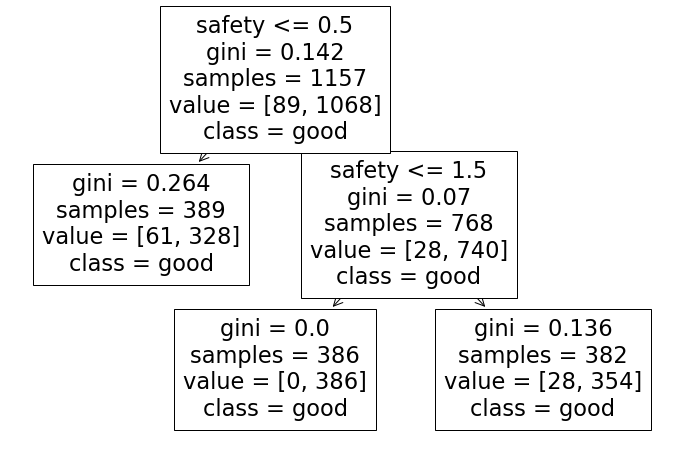

In [51]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model,feature_names=X_train.columns,class_names=df["class"].unique())
plt.show()

In [52]:
y_pred= model.predict(X_train)
print("Train Accuracy: ",accuracy_score(y_train, y_pred))
#print("Train Recall: ",recall_score(y_train, y_pred))
#print("Train Precision: ",precision_score(y_train, y_pred))

Train Accuracy:  0.9230769230769231


In [53]:
y_pred= model.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test, y_pred))

Test Accuracy:  0.9211908931698775
